In [22]:
import re
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import torch
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
from pathlib import Path

In [2]:
model_path = "diffusers/SD_finetuning"

unet = UNet2DConditionModel.from_pretrained(model_path + "/checkpoint-1000/unet")

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", unet=unet)#, torch_dtype=torch.bfloat16)
pipe.to("cuda")

image = pipe(prompt="An x-ray image of the lung, healthy patient, no signs of pneumonia").images[0]
#image.save("yoda-pokemon.png")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:07<00:00,  6.95it/s]


In [13]:
ckps = sorted(glob.glob(f'{model_path}/checkpoint-*'),key=lambda x:float(re.findall("(\d+)",x)[0]))

In [25]:
class_prompt_map = {'V' : "An x-ray image of the lung with viral pneumonia",
                    'B' : "An x-ray image of the lung with bacterial pneumonia",
                    'C' : "An x-ray image of the lung with covid-19 pneumonia",
                    'F' : "An x-ray image of the lung with fungal pneumonia",
                    'H' : "An x-ray image of the lung, healthy patient, no signs of pneumonia"
                   }

In [16]:
images = []
for ckp in ckps:
    unet = UNet2DConditionModel.from_pretrained(f'{ckp}/unet')

    pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", unet=unet)#, torch_dtype=torch.bfloat16)
    pipe.to("cuda")

    image = pipe(prompt="An x-ray image of the lung, healthy patient, no signs of pneumonia").images[0]
    images.append(image)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:06<00:00,  7.38it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:06<00:00,  7.32it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:06<00:00,  7.27it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:06<00:00,  7.22it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:06<00:00,  7.19it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextCo

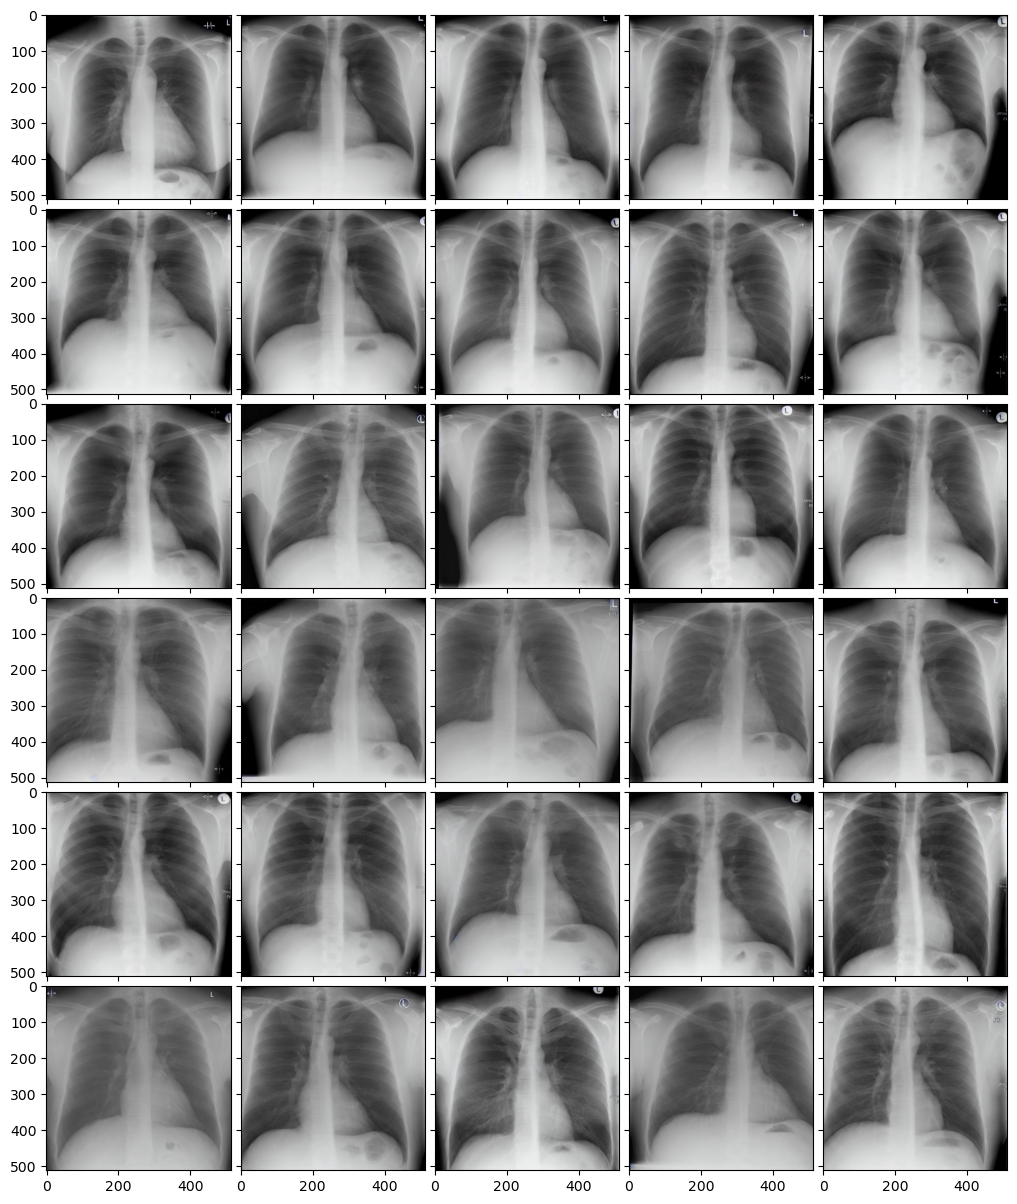

In [20]:
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()